In [1]:
%matplotlib notebook

import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

from diffusion_equation import *
from rope import *

<IPython.core.display.Javascript object>


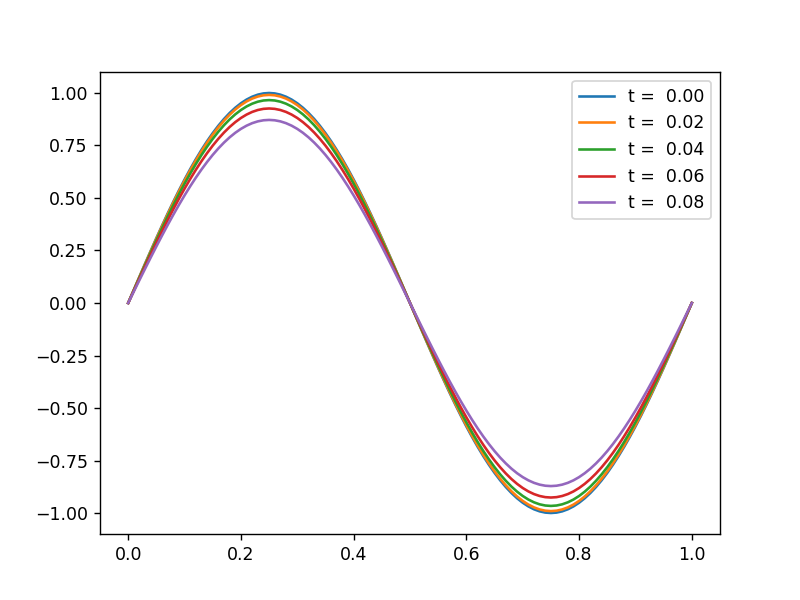

<IPython.core.display.Javascript object>


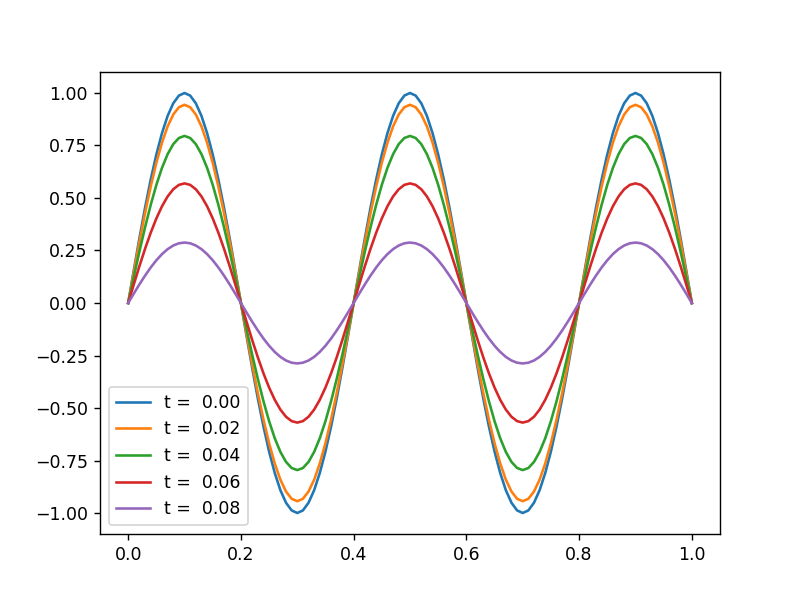

<IPython.core.display.Javascript object>


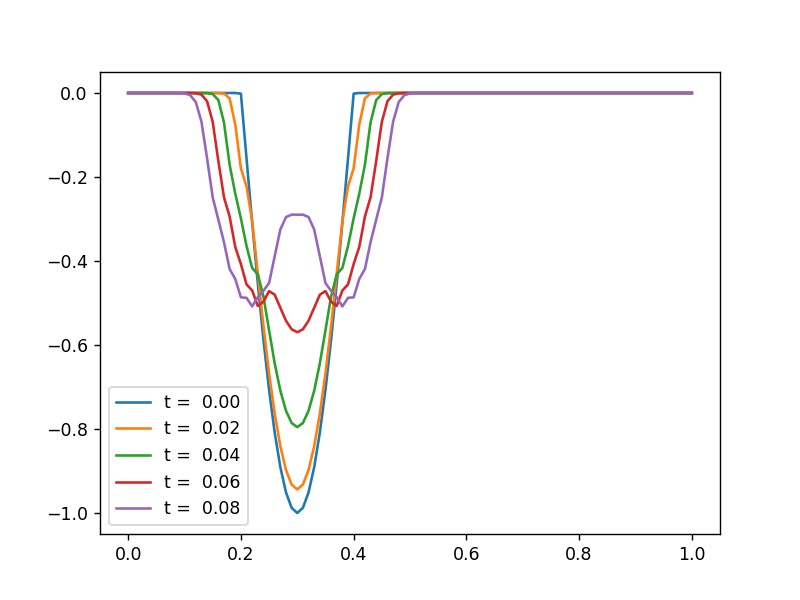

In [6]:
# exercise B

dx = 0.01
dt = 0.001

initial_position_functions = (
    lambda x: math.sin(2 * math.pi * x),
    lambda x: math.sin(5 * math.pi * x),
    lambda x: math.sin(5 * math.pi * x) if 0.2 < x < 0.4 else 0,
)

for initial_position_function in initial_position_functions:
    initial_position = [initial_position_function(x) for x in np.arange(0, 1 + dx, dx)]

    initial_position_table = [initial_position, initial_position]  # No initial velocity

    rope = Rope(initial_position_table, 1, dt, dx)
    rope.plot()

In [7]:
def exercise_C(initial_position_function):
    initial_position = [initial_position_function(x) for x in np.arange(0, 1 + dx, dx)]

    initial_position_table = [initial_position, initial_position]  # No initial velocity

    rope = Rope(initial_position_table, 1, dt, dx)
    rope.animate()

In [ ]:
exercise_C(initial_position_functions[0])

In [ ]:
exercise_C(initial_position_functions[1])

<IPython.core.display.Javascript object>


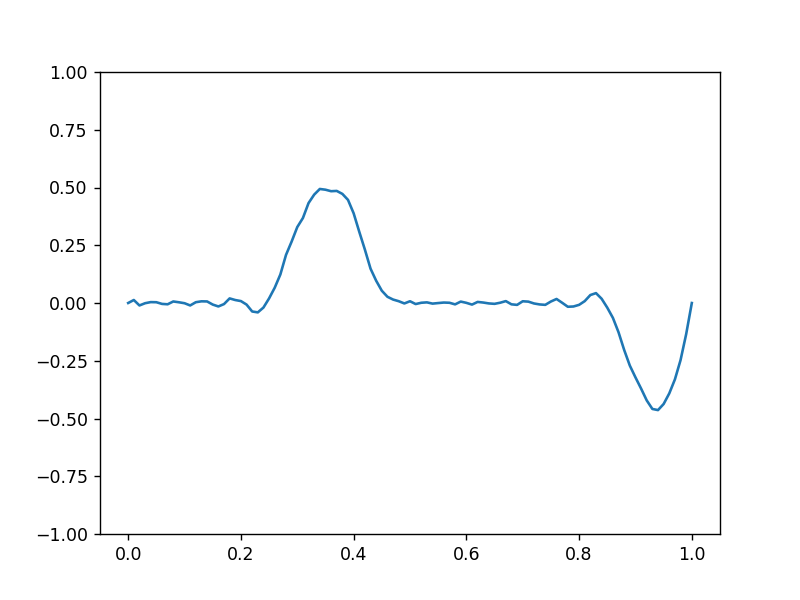

In [8]:
exercise_C(initial_position_functions[2])

In [4]:
# exercise E

sim = FiniteDifference(D=1, N=50)

t_values = [round(0.1**i, 3) for i in np.linspace(0, 3, 7, endpoint = True)]
differences = {}
sim_data = {}

while True:
    # print progress
    if sim.t*100 % 1 == 0:
        print(f"{sim.t*100:.0f}%     ", end="\r")
        
    if sim.t in t_values:    
        analytic = np.array([sim.analytic_sol(x, sim.t, 10**-4) for x in np.linspace(1, 0, len(sim.c))])
        simulate = sim.only_y()

        differences[sim.t] = simulate - analytic
        sim_data[sim.t] = simulate

    if sim.t == max(t_values):
        break

    sim.update()

plt.figure()

for key, value in differences.items():
    plt.plot(np.linspace(0, 1, len(sim.c)), value, label = key)

plt.xlabel("y")
plt.ylabel("Difference to analytic solution")
plt.legend()
plt.show()

plt.figure()

for key, value in sim_data.items():
    plt.plot(np.linspace(0, 1, len(sim.c)), value, label = key)

plt.xlabel("y")
plt.ylabel("c(y)")
plt.legend()
plt.show()

NameError: name 'FiniteDifference' is not defined

<IPython.core.display.Javascript object>


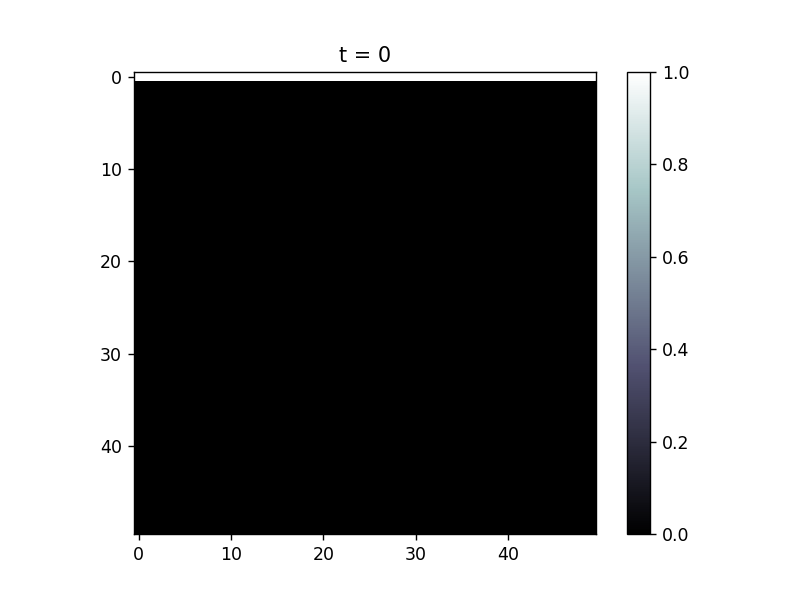

<IPython.core.display.Javascript object>


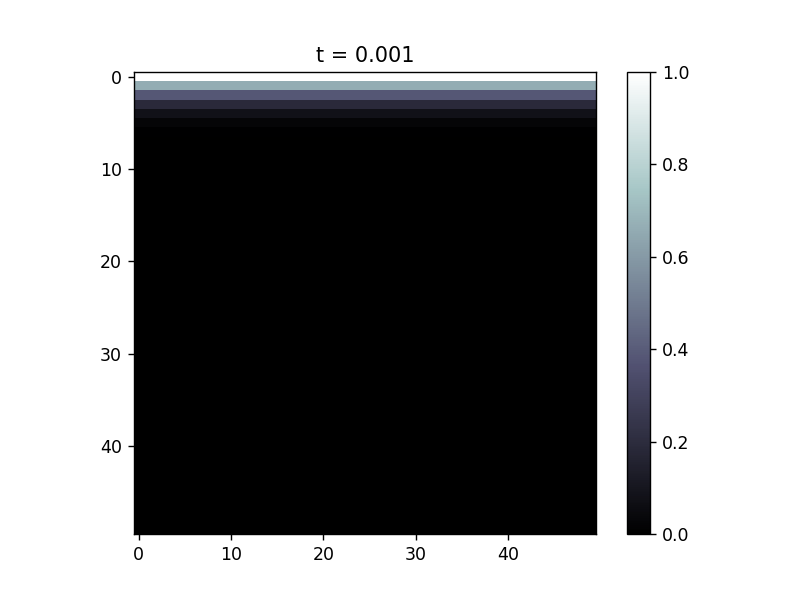

<IPython.core.display.Javascript object>


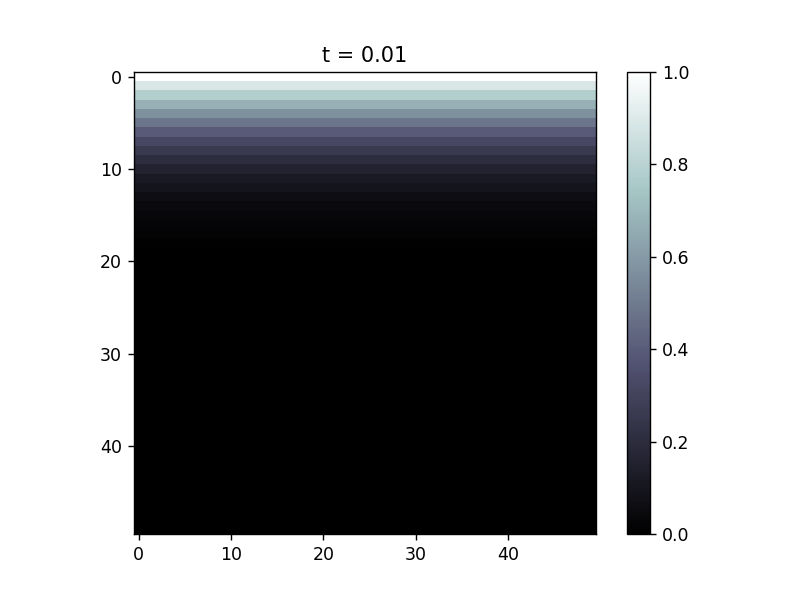

<IPython.core.display.Javascript object>


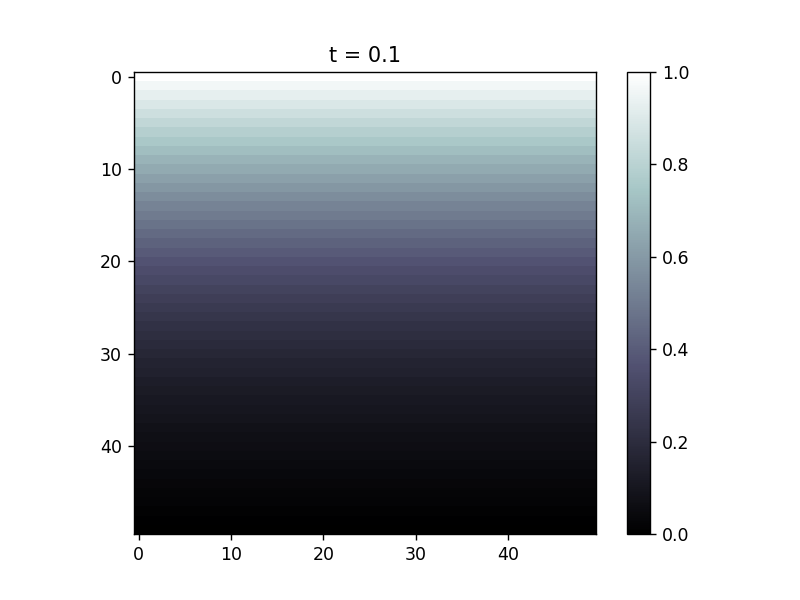

In [8]:
# exercise F

sim = FiniteDifference(D=1, N=50)

t_values = [0, 0.001, 0.01, 0.1, 1]

while True:
    # print progress
    if sim.t*100 % 1 == 0:
        print(f"{sim.t*100:.0f}%     ", end="\r")
        
    if sim.t in t_values:
        plt.figure()
        plt.title(f"t = {round(sim.t,8)}")
        sim.im = plt.imshow(sim.c, cmap='bone')
        plt.colorbar()
        plt.show()

    if sim.t == max(t_values):
        break

    sim.update()

<IPython.core.display.Javascript object>


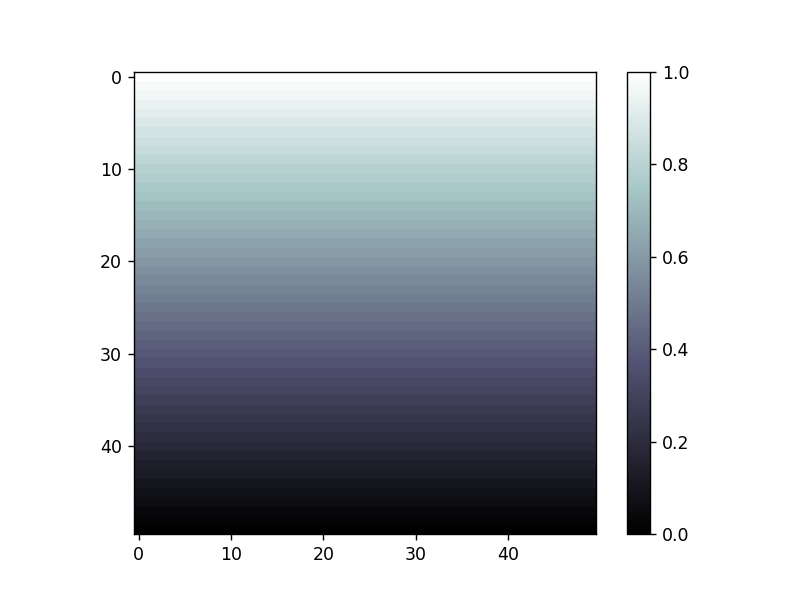

In [2]:
# exercise G

sim = SuccessiveOverRelaxation(D=1, N=50)
sim.im_animate('bone')

In [ ]:
# exercise H

Stopping condition met!


<IPython.core.display.Javascript object>


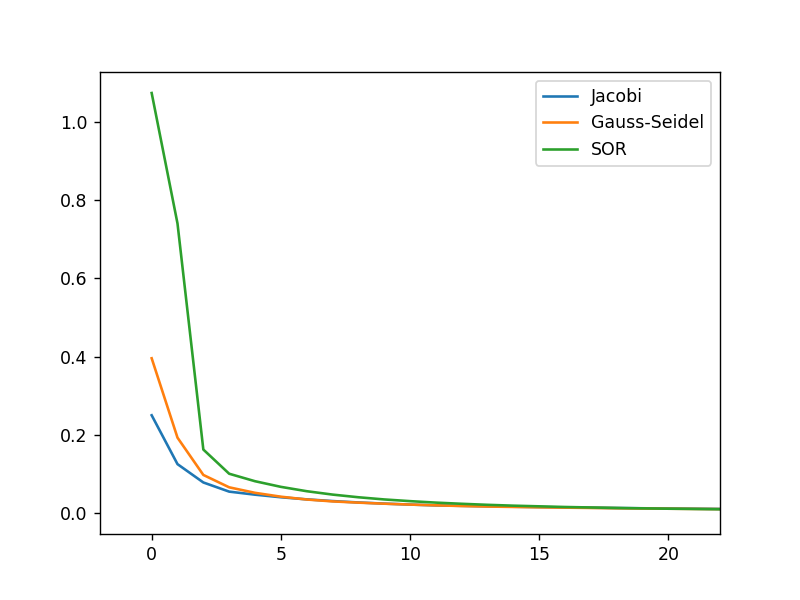

Stopping condition met!
Stopping condition met!


In [2]:
# exercise I
for sim in [JacobiIteration(), GaussSeidel(), SuccessiveOverRelaxation()]:
    deltas = []

    while sim.running:
        sim.update()
        deltas.append(sim.delta)

    plt.plot(deltas, label=str(sim))

plt.xlim(-2, 22)
plt.legend()
plt.show()

In [4]:
# exercise J/K

N_values = np.linspace(5, 200, 15, dtype=int)
    
omegas_no_objects = []
omegas_with_objects = []

iterations_no_objects = []
iterations_with_objects = []

for N in N_values:
    print(f"\rCalculating optimal omega for N={N}", end="")

    sim = Diffusion(N=N)
    optimal_omega, optimal_iteration = calc_optimal_omega(sim)
    omegas_no_objects.append(optimal_omega)
    iterations_no_objects.append(optimal_iteration)

    objects = [
        Rectangle((0.2, 0.2), 0.2, 0.05),
        Rectangle((0.4, 0.4), 0.2, 0.05),
        Circle((0.8, 0.2), 0.1),
    ]

    sim = Diffusion(objects=objects, N=N)
    optimal_omega, optimal_iteration = calc_optimal_omega(sim)
    omegas_with_objects.append(optimal_omega)
    iterations_with_objects.append(optimal_iteration)

plt.plot(N_values, omegas_no_objects, label="No objects")
plt.plot(N_values, omegas_with_objects, label="With objects")

plt.xlabel("N")
plt.ylabel("Optimal omega")
plt.legend()
plt.show()

plt.plot(N_values, iterations_no_objects, label="No objects")
plt.plot(N_values, iterations_with_objects, label="With objects")

plt.xlabel("N")
plt.ylabel("Iterations")
plt.legend()
plt.show()  

Calculating optimal omega for N=5

AttributeError: 'Diffusion' object has no attribute 'sor'